In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
fft = pd.read_csv('weak_fft_7913527.csv')
blas = pd.read_csv('weak_blas_7913901.csv')

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

def plot_weak_scaling(df, title="Weak Scaling of Runtime vs. Particle Count", save_svg=False, filename="weak_scaling_plot.svg"):
    # Set global font to CMU and enable LaTeX
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['CMU Serif']  # Use 'CMU Serif' for the main font
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r'\renewcommand{\rmdefault}{cmu}'

    # Calculate total particles and runtimes for each experiment_id
    group_size = df.groupby('experiment_id').size()
    n_particles = group_size * df['n_points'].iloc[0]
    
    # Get maximum runtime per experiment_id
    runtimes = df.groupby('experiment_id')['runtime'].max()
    m2l_runtimes = df.groupby('experiment_id')['m2l'].max()


    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Larger size and higher DPI for quality

    # Set bar widths as a fraction of n_particles
    relative_width = 0.3
    widths = n_particles * relative_width

    # Plot bars
    ax.bar(n_particles, runtimes, width=widths, align='center', color='skyblue', edgecolor='black')

    # Set x-axis to logarithmic
    ax.set_xscale('log')

    # Labeling the axes with LaTeX expressions for testing
    ax.set_xlabel(r'Total Number of Particles', fontsize=14)
    ax.set_ylabel(r'Runtime ($ms$)', fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize ticks and grid
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

    # Save the plot as SVG if specified
    if save_svg:
        plt.savefig(filename, format="svg", bbox_inches="tight")

    plt.show()

colors = ["#87CEEB", "#FA8072", "#DAA520", "#3CB371", "#6A5ACD", "#FF7F50", "#9932CC", "#FF6347", "#40E0D0"]


def plot_weak_scaling_stacked(df, title="Weak Scaling of Runtime vs. Particle Count", save_svg=False, filename="weak_scaling_plot.svg"):
    # Set global font to CMU and enable LaTeX
    rcParams['font.family'] = 'serif'
    rcParams['font.serif'] = ['CMU Serif']  # Use 'CMU Serif' for the main font
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r'\renewcommand{\rmdefault}{cmu}'

    # Calculate total particles and runtimes for each experiment_id
    group_size = df.groupby('experiment_id').size()
    n_particles = group_size * df['n_points'].iloc[0]
    
    # Get maximum runtime per experiment_id
    runtimes = df.groupby('experiment_id')['runtime'].max()
    m2l_runtimes = df.groupby('experiment_id')['m2l'].max()
    p2p_runtimes = df.groupby('experiment_id')['p2p'].max()
    ghost_exchange_u = df.groupby('experiment_id')['ghost_exchange_u'].max()
    ghost_exchange_v = df.groupby('experiment_id')['ghost_exchange_v'].max()
    ghost_exchange_v_runtime = df.groupby('experiment_id')['ghost_exchange_v_runtime'].max()


    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Larger size and higher DPI for quality

    # Set bar widths and offsets
    relative_width = 0.3
    widths = n_particles * relative_width
    offset = widths / 2  # Offset for second set of bars
    
    # Plot bars
    ax.bar(n_particles, m2l_runtimes, width=widths, align='center', color='skyblue', edgecolor='black', label='M2L Runtime')
    ax.bar(n_particles, p2p_runtimes, bottom=m2l_runtimes,  width=widths, align='center', color='salmon', edgecolor='black', label='P2P Runtime')
    ax.bar(n_particles, ghost_exchange_v_runtime, bottom=p2p_runtimes+m2l_runtimes, width=widths, align='center', color='slateblue', edgecolor='black', label='Ghost Exchange V Runtime')

    # Plot the second set of stacked bars (ghost_exchange_u + ghost_exchange_v)
    ax.bar(n_particles + offset, ghost_exchange_u, width=widths, align='center', color='goldenrod', edgecolor='black', label='Ghost Exchange U')
    ax.bar(n_particles + offset, ghost_exchange_v, bottom=ghost_exchange_u, width=widths, align='center', color='MediumSeaGreen', edgecolor='black', label='Ghost Exchange V')

    
    # Set x-axis to logarithmic
    ax.set_xscale('log')

    # Labeling the axes with LaTeX expressions for testing
    ax.set_xlabel(r'Total Number of Particles', fontsize=14)
    ax.set_ylabel(r'Runtime ($ms$)', fontsize=14)
    ax.set_title(title, fontsize=16)

    # Customize ticks and grid
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

    ax.legend()
    # Save the plot as SVG if specified
    if save_svg:
        plt.savefig(filename, format="svg", bbox_inches="tight")

    plt.show()

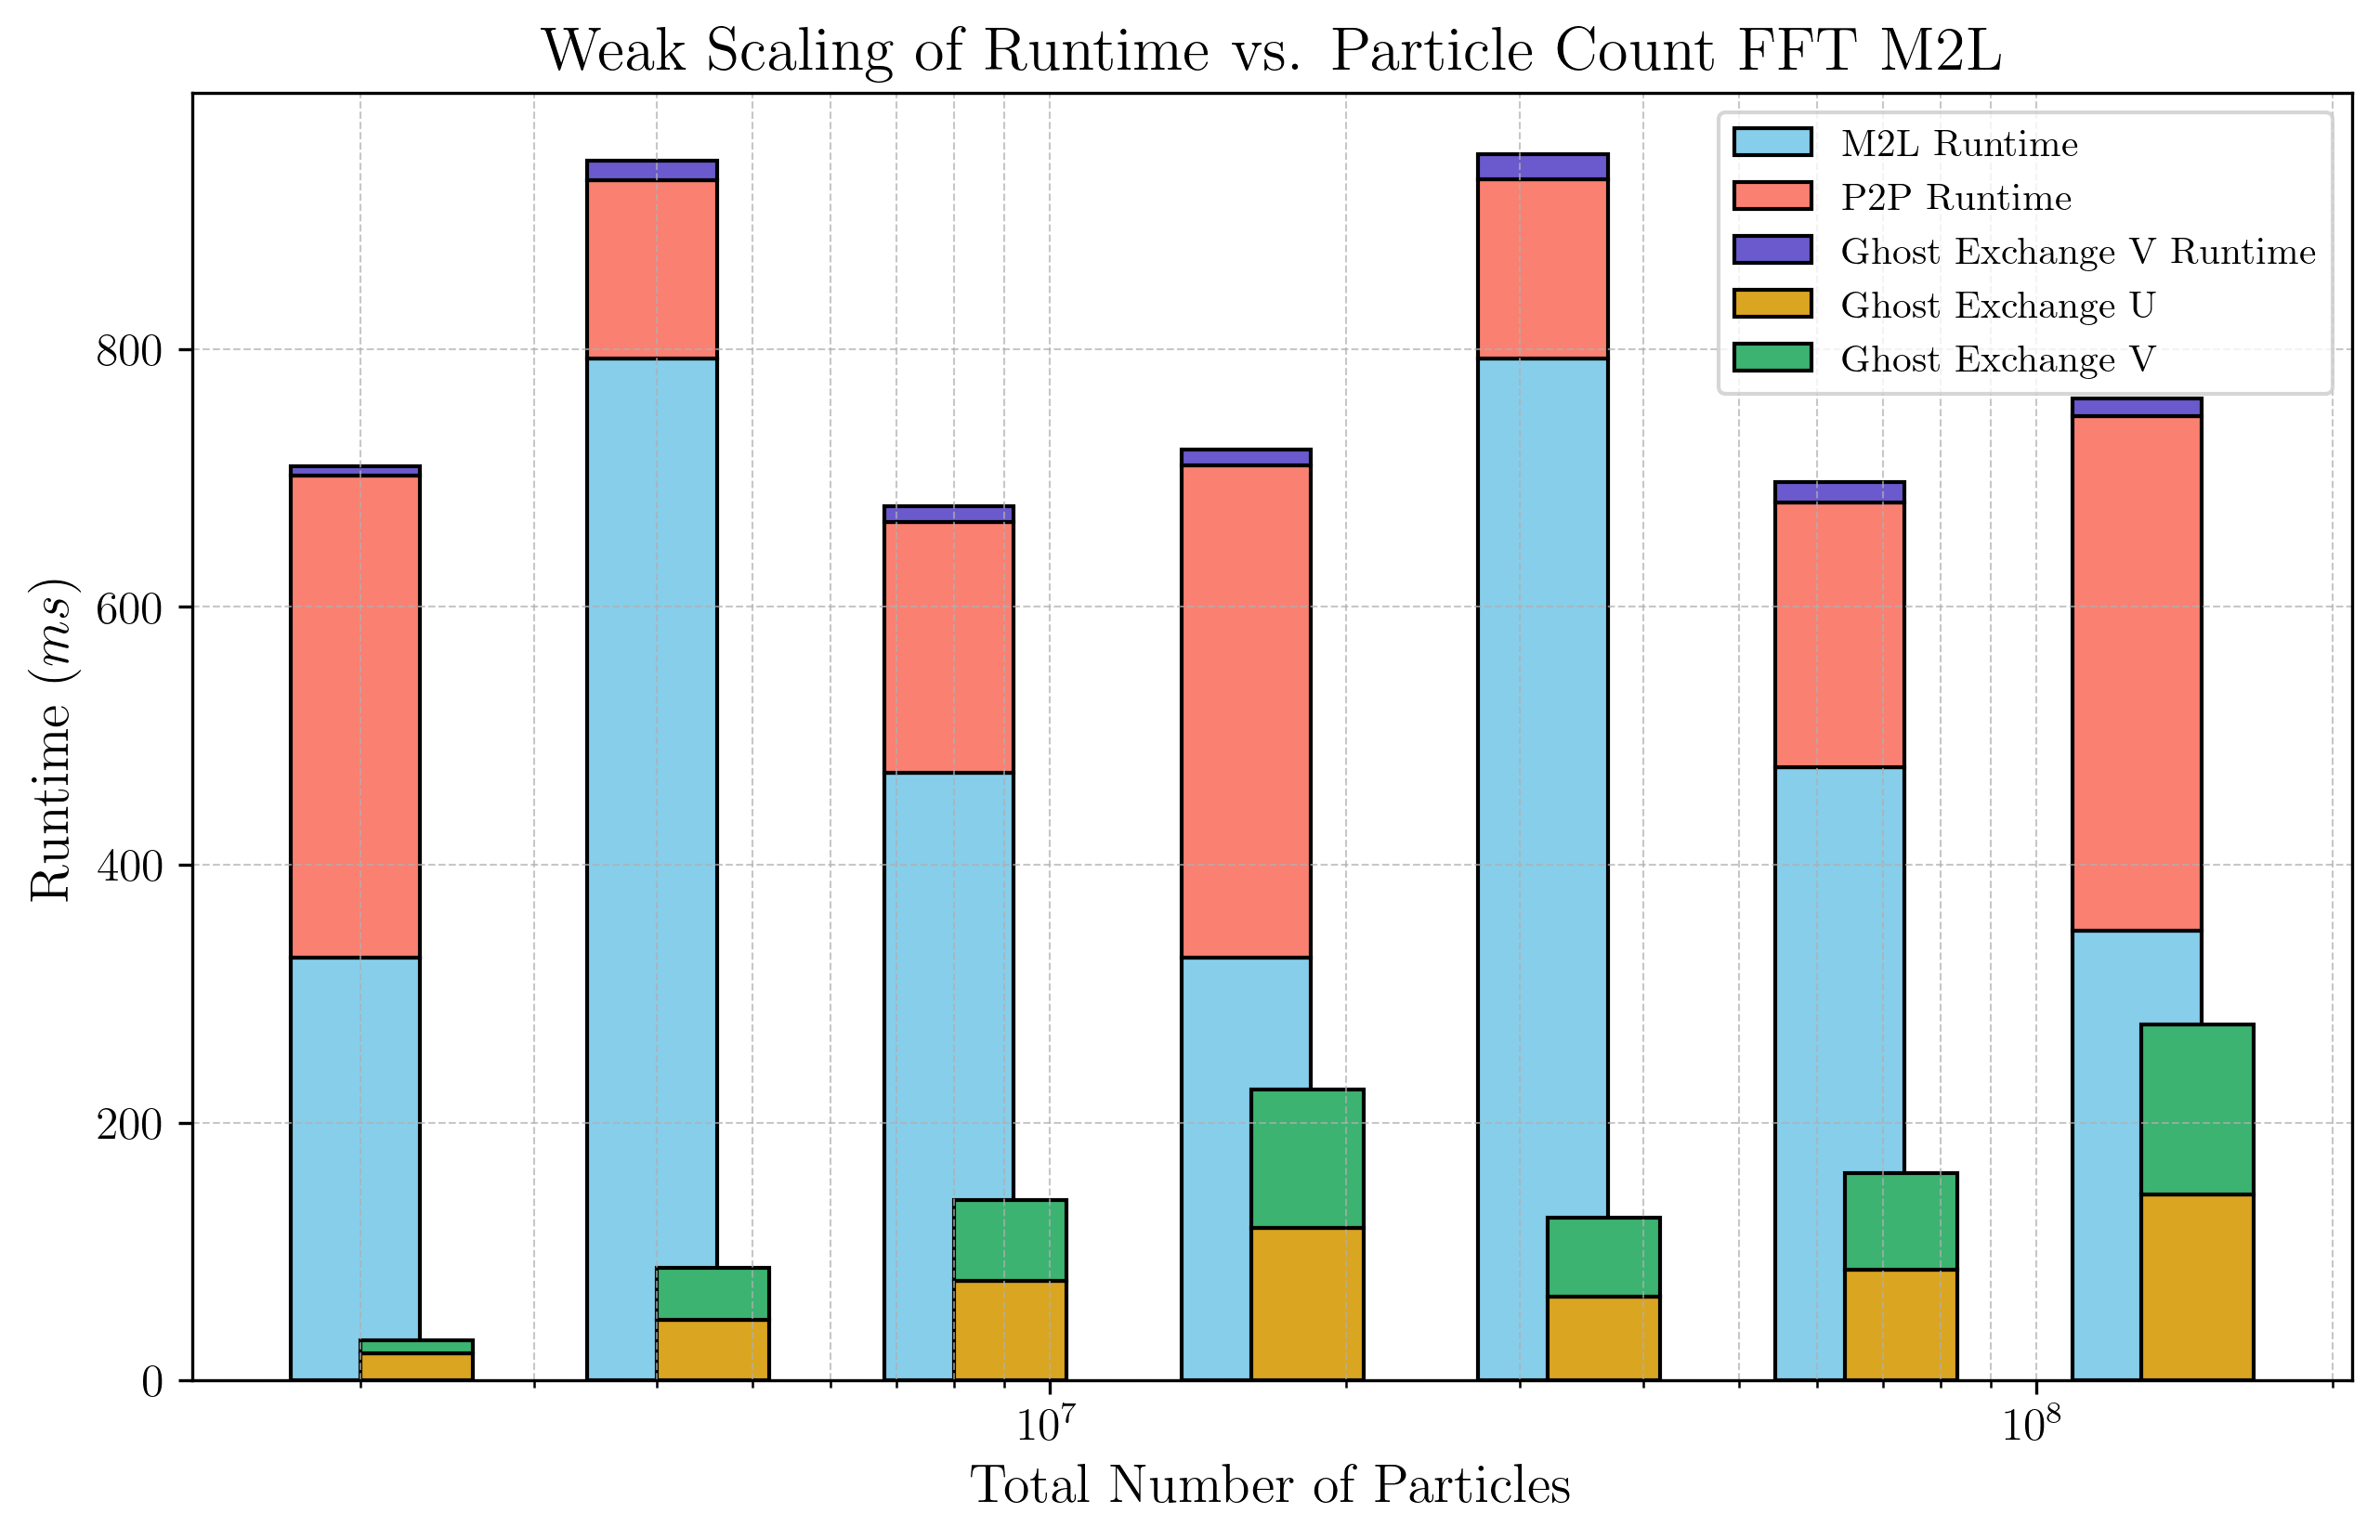

In [14]:
plot_weak_scaling_stacked(fft, title="Weak Scaling of Runtime vs. Particle Count FFT M2L")

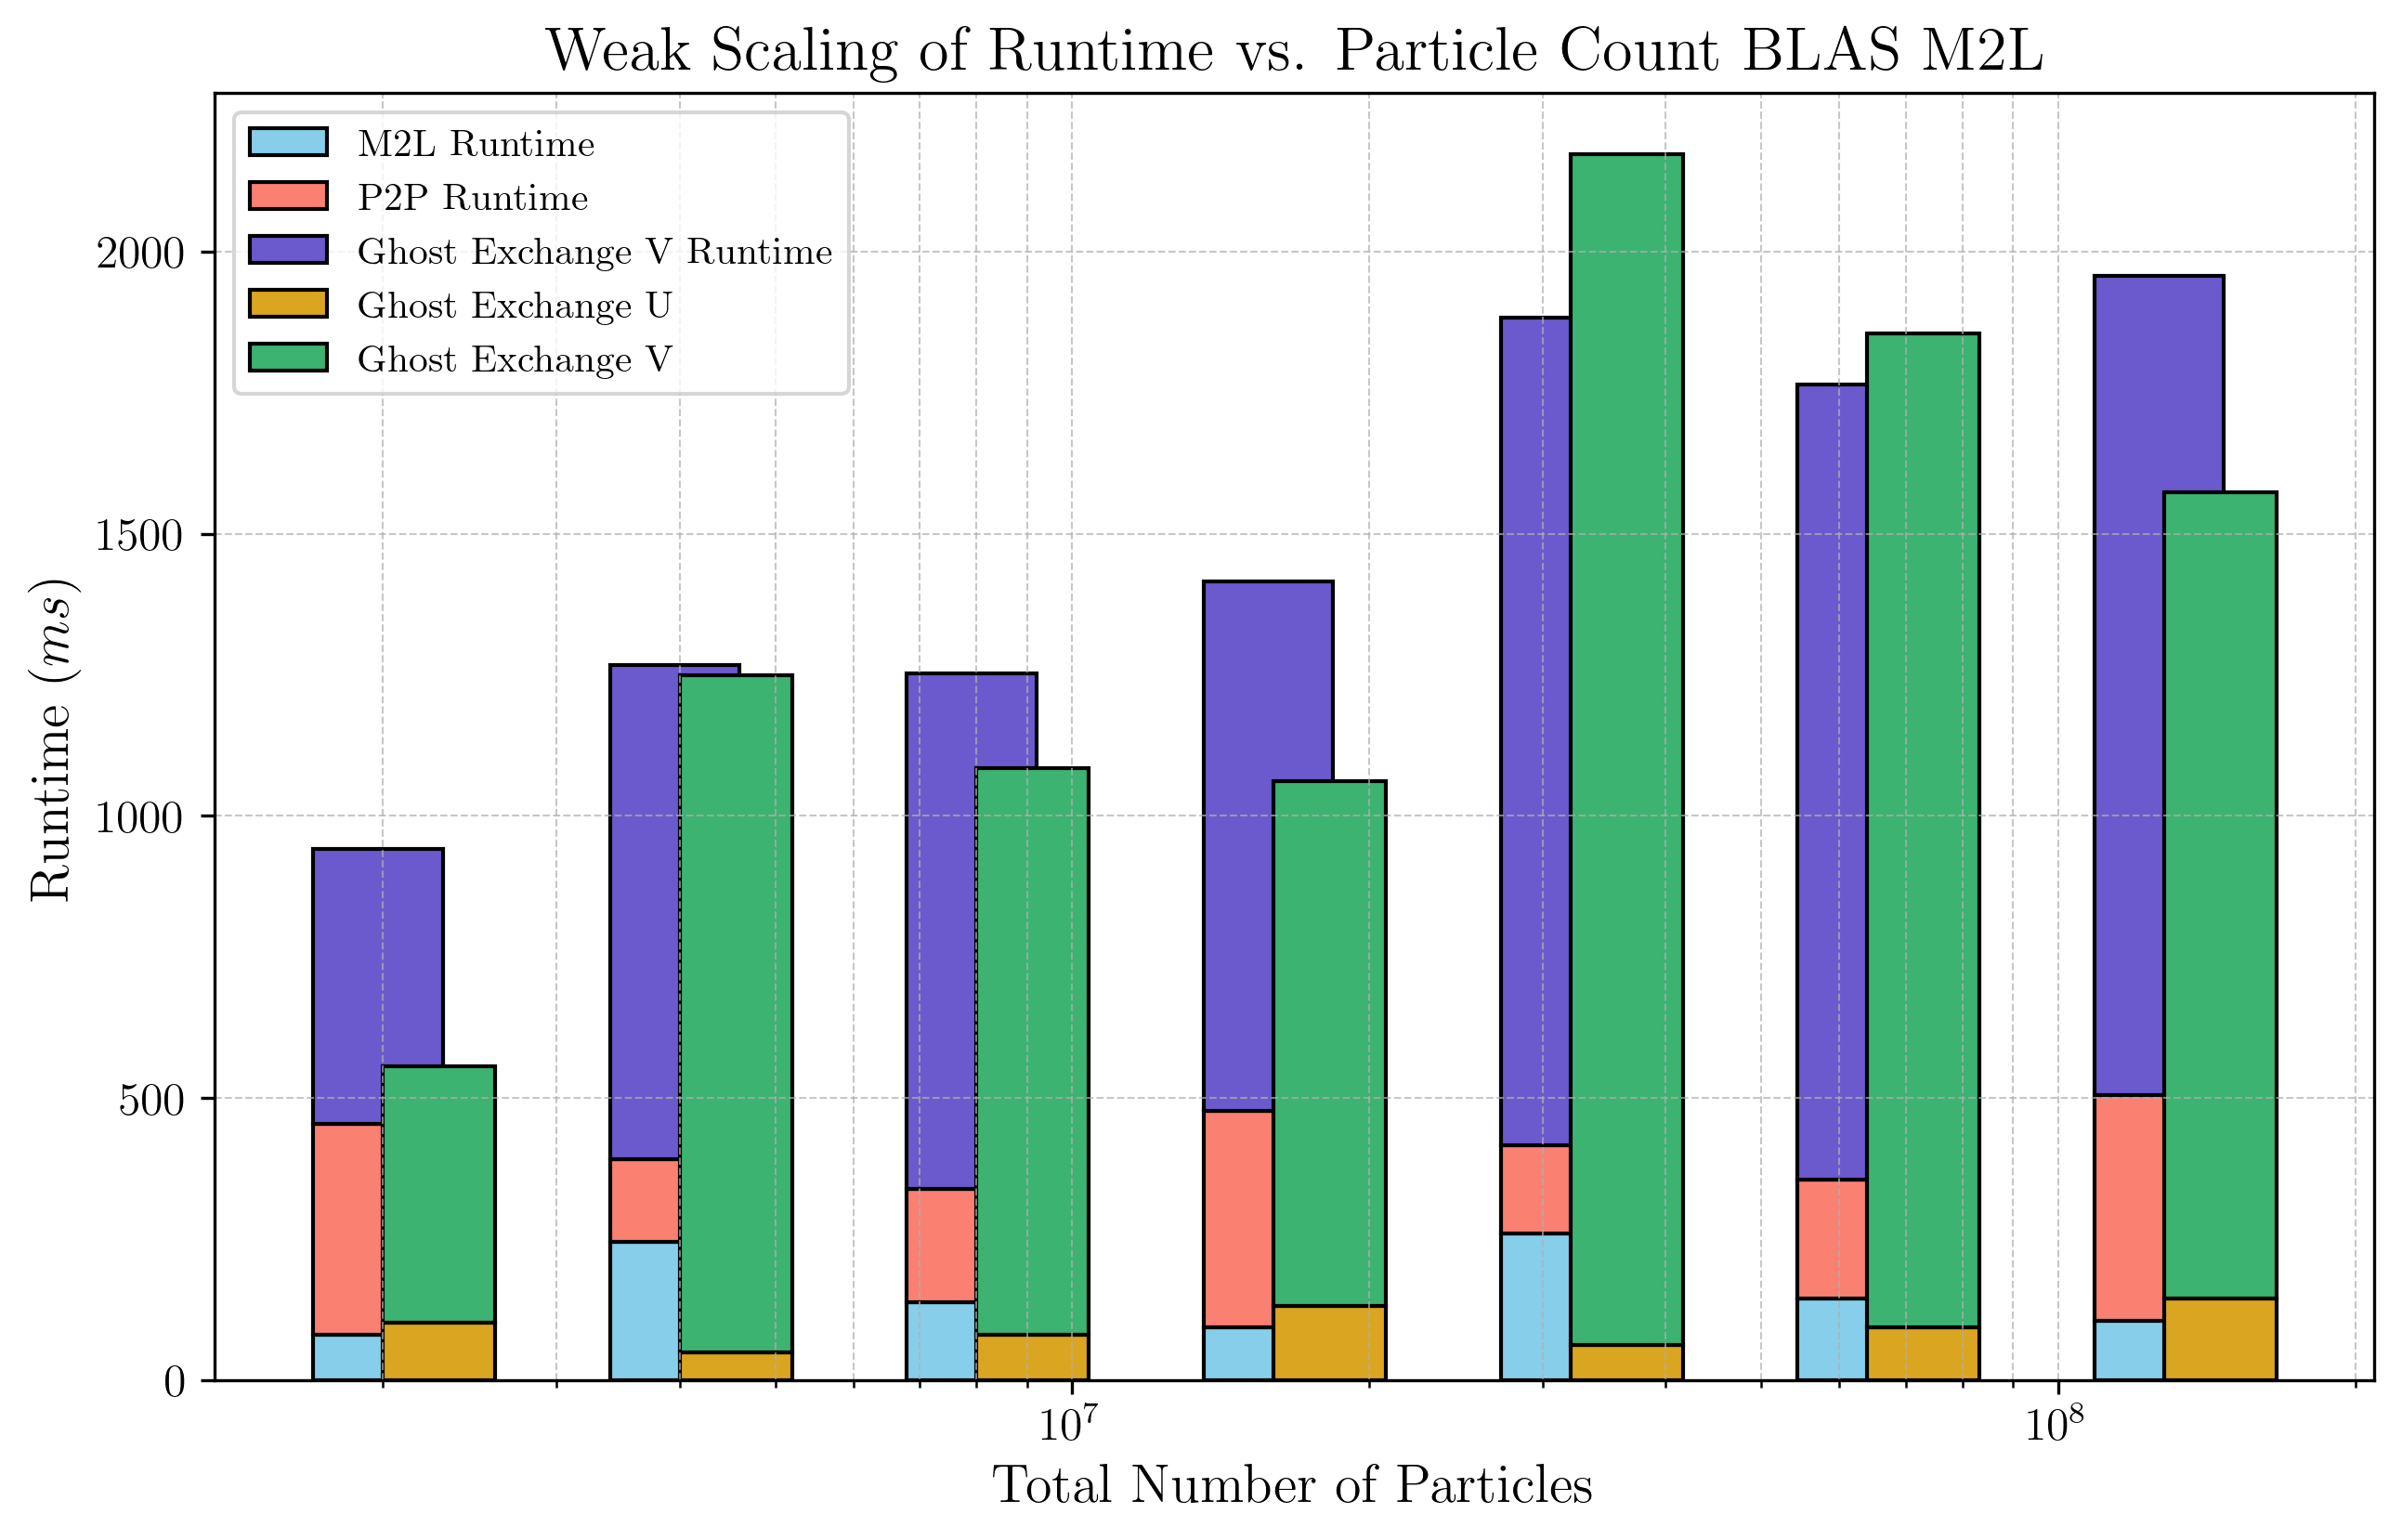

In [15]:
plot_weak_scaling_stacked(blas, title="Weak Scaling of Runtime vs. Particle Count BLAS M2L")